In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import t
import statsmodels.api as sm

In [ ]:
#Question 3

In [4]:
df=pd.read_csv("data.csv")

In [5]:
df.head()

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118
3,4,135,127
4,5,148,140


In [6]:
df.columns

Index(['Patient ID', ' Blood Pressure Before (mmHg)',
       ' Blood Pressure After (mmHg)'],
      dtype='object')

In [7]:
m=df[' Blood Pressure Before (mmHg)'].mean()

In [8]:
#. To measure the dispersion in both groups, we can calculate the standard deviation. 
#The standard deviation provides a measure of how spread out the data is within each group

In [21]:
std_A=np.std(df[' Blood Pressure Before (mmHg)'])

In [22]:
std_B=np.std(df[" Blood Pressure After (mmHg)"])

In [24]:

from scipy.stats import t

Mean_A = np.mean(group_A)
Mean_B = np.mean(group_B)

confidence_interval_A = t.interval(0.95, len(group_A)-1, loc=Mean_A, scale=std_A/np.sqrt(len(group_A)))
confidence_interval_B = t.interval(0.95, len(group_B)-1, loc=Mean_B, scale=std_B/np.sqrt(len(group_B)))

print("Mean (Group A):", Mean_A)
print("95% Confidence Interval (Group A):", confidence_interval_A)
print("Mean (Group B):", Mean_B)
print("95% Confidence Interval (Group B):", confidence_interval_B)


Mean (Group A): 133.91
95% Confidence Interval (Group A): (132.6073211471305, 135.2126788528695)
Mean (Group B): 128.36
95% Confidence Interval (Group B): (127.00011781341104, 129.719882186589)


In [13]:
#c. To calculate the Mean Absolute Deviation (MAD) and Standard Deviation (SD), we can use the following formulas:

In [14]:
group_A=df[' Blood Pressure Before (mmHg)']
group_B=df[" Blood Pressure After (mmHg)"]

In [16]:
mad_A = np.mean(np.abs(group_A - Mean_A))
mad_B = np.mean(np.abs(group_B - Mean_B))

sd_A = np.std(group_A)
sd_B = np.std(group_B)

print("Mean Absolute Deviation (Group A):", mad_A)
print("Standard Deviation (Group A):", sd_A)
print("Mean Absolute Deviation (Group B):", mad_B)
print("Standard Deviation (Group B):", sd_B)


Mean Absolute Deviation (Group A): 5.7118
Standard Deviation (Group A): 6.5652037287505385
Mean Absolute Deviation (Group B): 5.9
Standard Deviation (Group B): 6.853495458523338


In [17]:
# To calculate the correlation coefficient and check its significance at a 1% level of significance, 
#we can use Pearson's correlation coefficient and perform a hypothesis test

In [18]:
from scipy.stats import pearsonr

correlation_coefficient, p_value = pearsonr(group_A, group_B)

print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)


Correlation Coefficient: 0.9779485966556019
P-value: 1.8097381433068541e-68


In [30]:
np.var(df[' Blood Pressure Before (mmHg)'])

43.10189999999998

In [29]:
np.var(df[" Blood Pressure After (mmHg)"])

46.97040000000002

In [22]:
#Question 6

<AxesSubplot:xlabel=' Blood Pressure Before (mmHg)', ylabel='Count'>

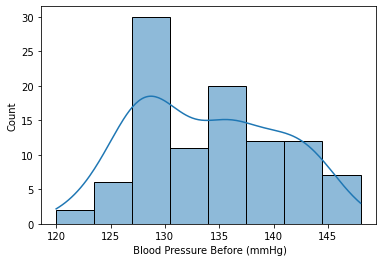

In [37]:
sns.histplot(data=df,x=' Blood Pressure Before (mmHg)',kde=True)

<AxesSubplot:xlabel=' Blood Pressure After (mmHg)', ylabel='Count'>

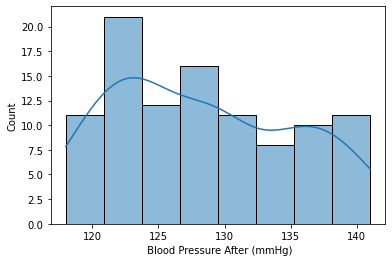

In [38]:
sns.histplot(data=df,x=' Blood Pressure After (mmHg)',kde=True)

In [43]:
np.corrcoef(df[' Blood Pressure Before (mmHg)'])

1.0

In [44]:
np.corrcoef(df[' Blood Pressure After (mmHg)'])

1.0

In [46]:
np.mean(np.abs(df - np.mean(df)))

Patient ID                       25.0000
 Blood Pressure Before (mmHg)     5.7118
 Blood Pressure After (mmHg)      5.9000
dtype: float64

In [48]:
df.tail(10)

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
90,91,140,135
91,92,132,127
92,93,145,141
93,94,124,118
94,95,128,121
95,96,136,129
96,97,143,137
97,98,127,123
98,99,139,135
99,100,135,130


In [62]:
df1=pd.read_csv("Blood.csv")

In [63]:
df1.head(3)

,Patient ID,Blood Pressure Before (mmHg),Blood Pressure After (mmHg)
0,1,130,120
1,2,142,135
2,3,120,118


In [64]:
df1["Difference"]=df1[" Blood Pressure Before (mmHg)"] - df1[' Blood Pressure After (mmHg)']

<AxesSubplot:xlabel='Difference', ylabel='Count'>

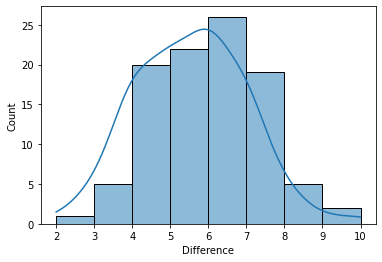

In [65]:
sns.histplot(data=df1,x='Difference',kde=True)

In [60]:
#The difference is not perfectly normally distributed but approximate to normal distribution 

Text(0.5, 1.0, 'Q-Q Plot')

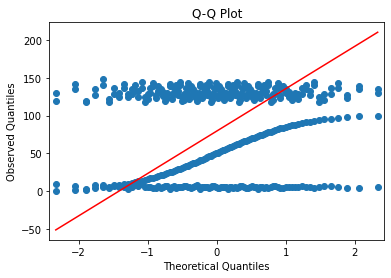

In [69]:
sm.qqplot(df1,line='s')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Observed Quantiles')
plt.title('Q-Q Plot')

In [ ]:
#Question 11

In [15]:
df2=pd.read_csv("Blood.csv")

In [ ]:
#Check whether the distribution of all the classes are the same or not.


In [12]:
from scipy.stats import ttest_rel

# Perform a paired t-test
t_statistic, p_value = ttest_rel(df2[' Blood Pressure Before (mmHg)'], df2[' Blood Pressure After (mmHg)'])

# Check the p-value
alpha = 0.05
if p_value < alpha:
    print("The distributions are different.")
else:
    print("The distributions are the same.")


The distributions are different.


In [16]:
#Check for the equality of variance/


In [14]:
from scipy.stats import levene

# Perform Levene's test for equality of variances
statistic, p_value = levene(df2[' Blood Pressure Before (mmHg)'], df2[' Blood Pressure After (mmHg)'])

# Check the p-value
alpha = 0.05
if p_value < alpha:
    print("The variances are not equal.")
else:
    print("The variances are equal.")


The variances are equal.


In [17]:
#Which amount LDA and QDA would perform better on this data for
#classification and why

In [18]:
"""To determine whether Linear Discriminant Analysis (LDA) or Quadratic Discriminant Analysis (QDA) would perform better for classification on this data, we need to consider the assumptions of both methods. LDA assumes that the groups have the same covariance matrix, while QDA assumes that each group has its own covariance matrix.

Since we have already determined that the variances are equal (as per b), the assumption of LDA is satisfied. Hence, LDA would likely perform better on this data as it assumes a common covariance matrix."""

'To determine whether Linear Discriminant Analysis (LDA) or Quadratic Discriminant Analysis (QDA) would perform better for classification on this data, we need to consider the assumptions of both methods. LDA assumes that the groups have the same covariance matrix, while QDA assumes that each group has its own covariance matrix.\n\nSince we have already determined that the variances are equal (as per b), the assumption of LDA is satisfied. Hence, LDA would likely perform better on this data as it assumes a common covariance matrix.'

In [19]:
# Check the equality of mean for between all the classes

In [21]:
from scipy.stats import f_oneway

# Perform one-way ANOVA
f_statistic, p_value = f_oneway(df2[' Blood Pressure Before (mmHg)'], df2[' Blood Pressure After (mmHg)'])

# Check the p-value
alpha = 0.05
if p_value < alpha:
    print("The means are not equal across all classes.")
else:
    print("The means are equal across all classes.")


The means are not equal across all classes.
